#Lectura del dataset limpio

In [1]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lectura df
from google.colab import drive
drive.mount ("/gdrive")

ruta= "/gdrive/MyDrive/Colab Notebooks/Dataset_banco/dataset_banco_clean.csv"
df = pd.read_csv(ruta)

Mounted at /gdrive


In [3]:
#Ver el tamañao
print(df.shape)

#Ver las primeras lineas 
df.info()

(45189, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  45189 non-null  int64  
 1   age         45189 non-null  int64  
 2   job         45189 non-null  object 
 3   marital     45189 non-null  object 
 4   education   45189 non-null  object 
 5   default     45189 non-null  object 
 6   balance     45189 non-null  float64
 7   housing     45189 non-null  object 
 8   loan        45189 non-null  object 
 9   contact     45189 non-null  object 
 10  day         45189 non-null  int64  
 11  month       45189 non-null  object 
 12  duration    45189 non-null  float64
 13  campaign    45189 non-null  int64  
 14  pdays       45189 non-null  float64
 15  previous    45189 non-null  int64  
 16  poutcome    45189 non-null  object 
 17  y           45189 non-null  object 
dtypes: float64(3), int64(5), object(10)
memory usage: 6.2+

In [4]:
#Eliminar la columna Unnamed: 0
df = df.drop("Unnamed: 0", axis=1).reset_index(drop=True)  
#En este código, df.drop("Unnamed: 0", axis=1) elimina la columna "Unnamed: 0" del dataframe df. 
#Luego, .reset_index(drop=True) restablece el índice del dataframe, eliminando el índice numérico
#anterior y reemplazándolo por un nuevo índice predeterminado. La opción drop=True se utiliza para 
#descartar el índice anterior y evitar que se agregue como una columna adicional.

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


#Análisis Exploratorio

Entender los datos para buscar o encontrar una respuesta a la pregunta inicial del problema.

Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services") 
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular") 
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

##Análisis de cada variable

Permite entender las características generales de cada variable.

In [6]:
#Ver cuales son categóricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


Realizar un gráfico de barras por cada variable categórica, en la cual se observan los subniveles

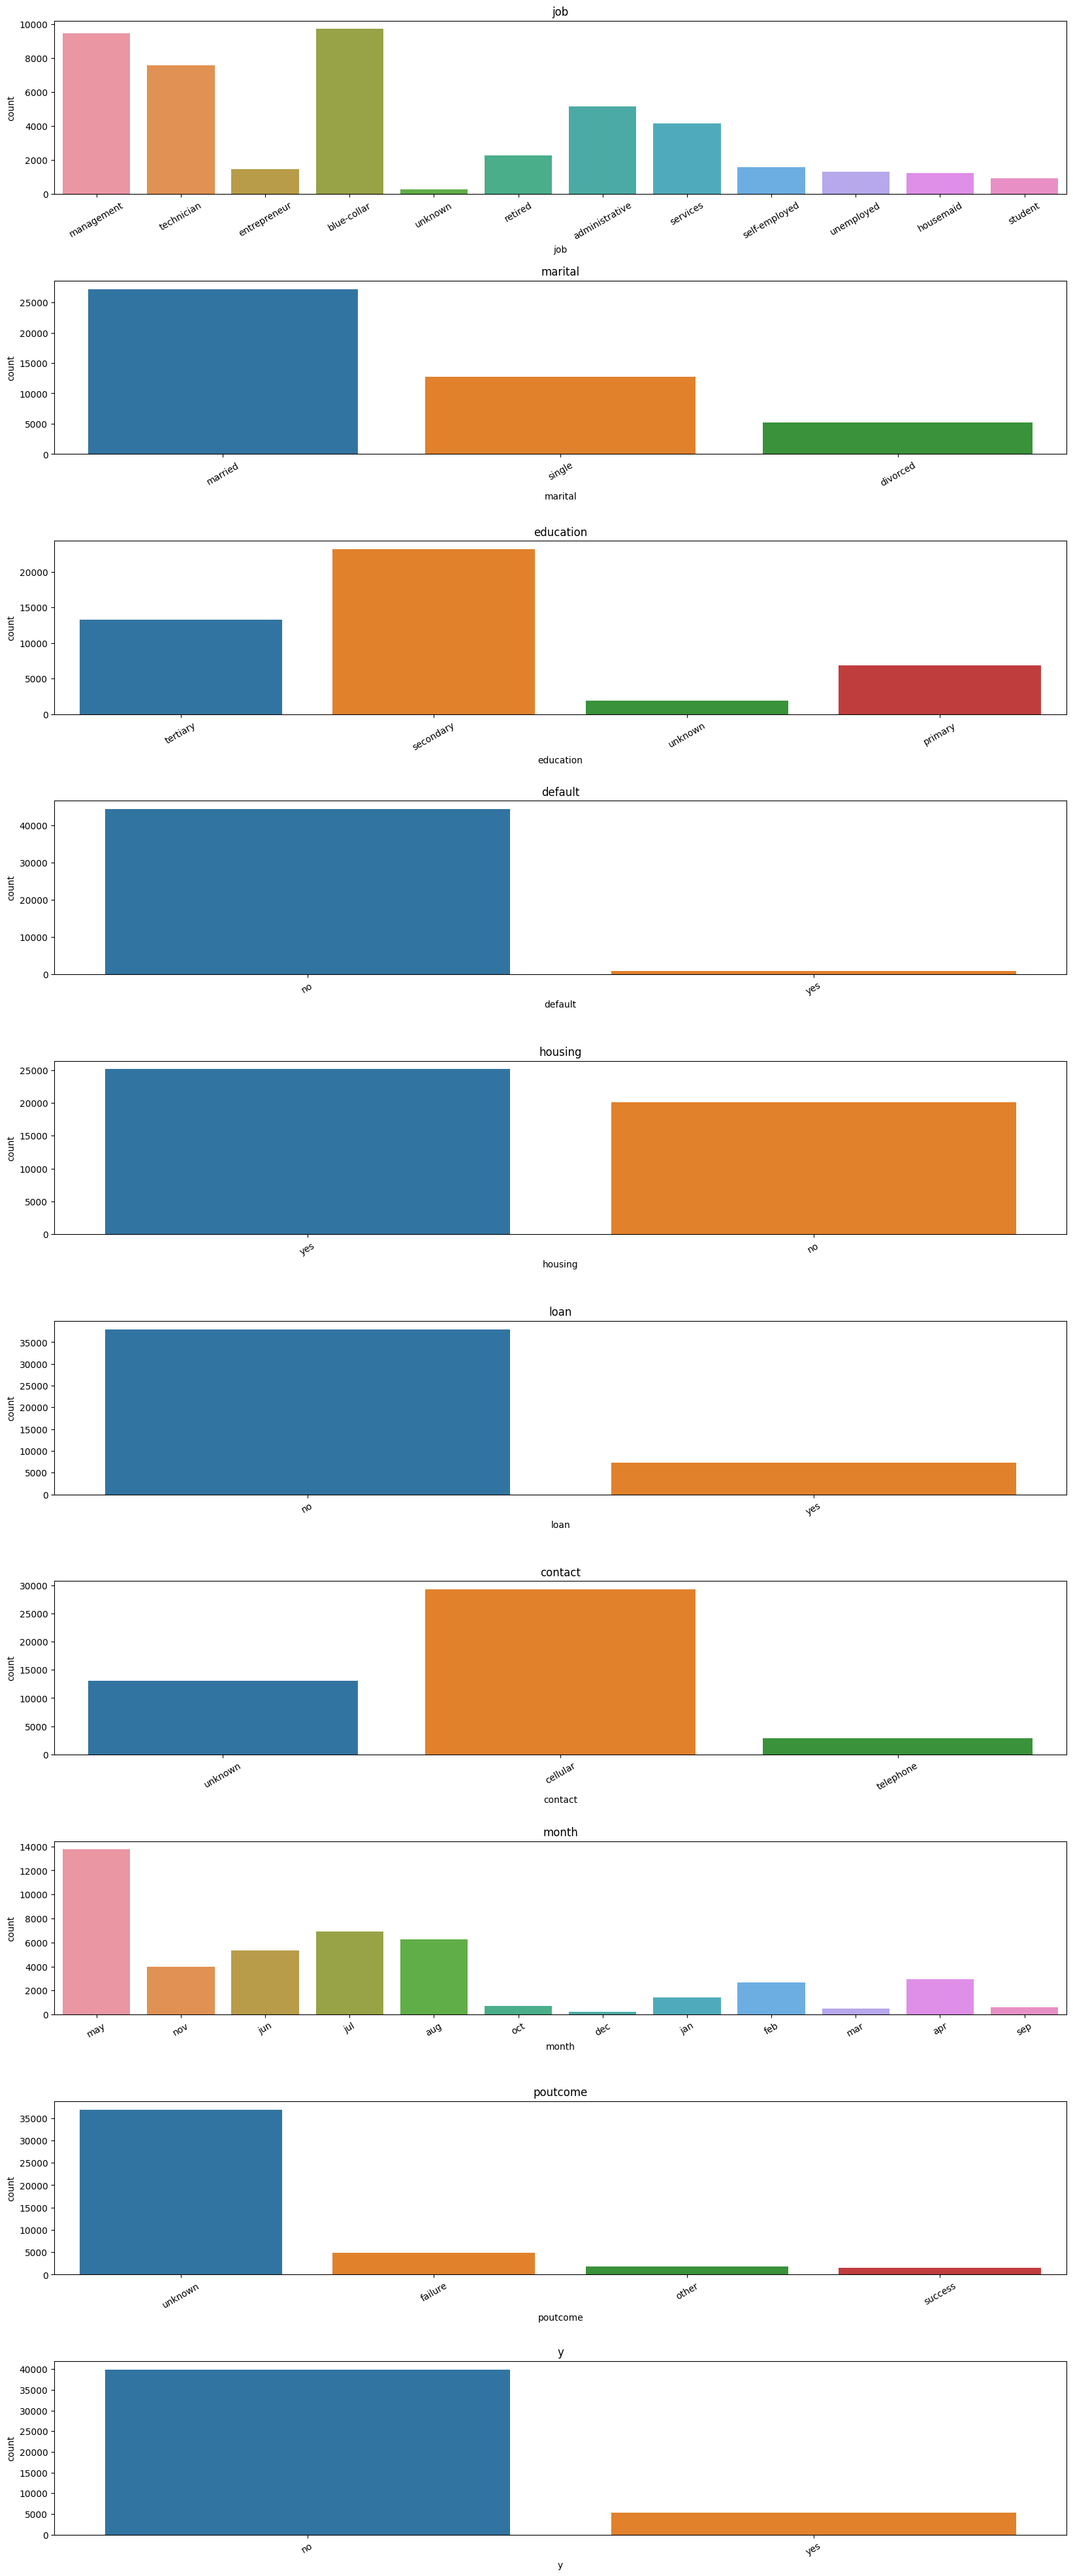

In [7]:
#Variables categóricas
cols_cat = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y" ]

#Grafico de barras de conteo de cada subcategoría
fig, ax = plt.subplots (nrows=len(cols_cat), ncols=1, figsize=(20,50))
plt.subplots_adjust (hspace=0.5)

for i, col in enumerate (cols_cat):
    sns.countplot (data=df, x=col, ax=ax[i])
    ax[i].set_title (col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

Observaciones:
* job: mayor trabajo; management, blue-collar, technician.
* marital: mayor cantidad married.
* education: mayor secondary , tertiary.
* default: la mayoria paga.
* housing: hipoteca, muy parecidos.
* loan: la mayoria no tiene gastos a pagar.
* contact: la mayoria se contacto por cellular.
* month: may
* poutcome: (resultado) la mayoria no se conoce.
* y: la gran mayoria no.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


##Eliminar las columnas que no son importantes para el análisis de datos.

In [9]:
cols_eliminar=["contact","day","month","duration","campaign","pdays","previous"]
df.drop(cols_eliminar, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   poutcome   45189 non-null  object 
 9   y          45189 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


##Analizar las variables numéricas a travez de las medidas de tendencias centrales. (Describe)

In [10]:
df.describe()

,age,balance
count,45189.000000,45189.000000
mean,40.936445,1374.012149
std,10.618502,3924.370039
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,527532.000000


Observaciones: el promedio es de 41 años con un saldo en cuenta promediio en Euros de 1374. La edad minima de personas contactadas fue de 18 y maxima de 95 años. El 75% de los datos tiene 1428 Euros en la cuenta y unos 48 años. 

## Graficar Histogramas

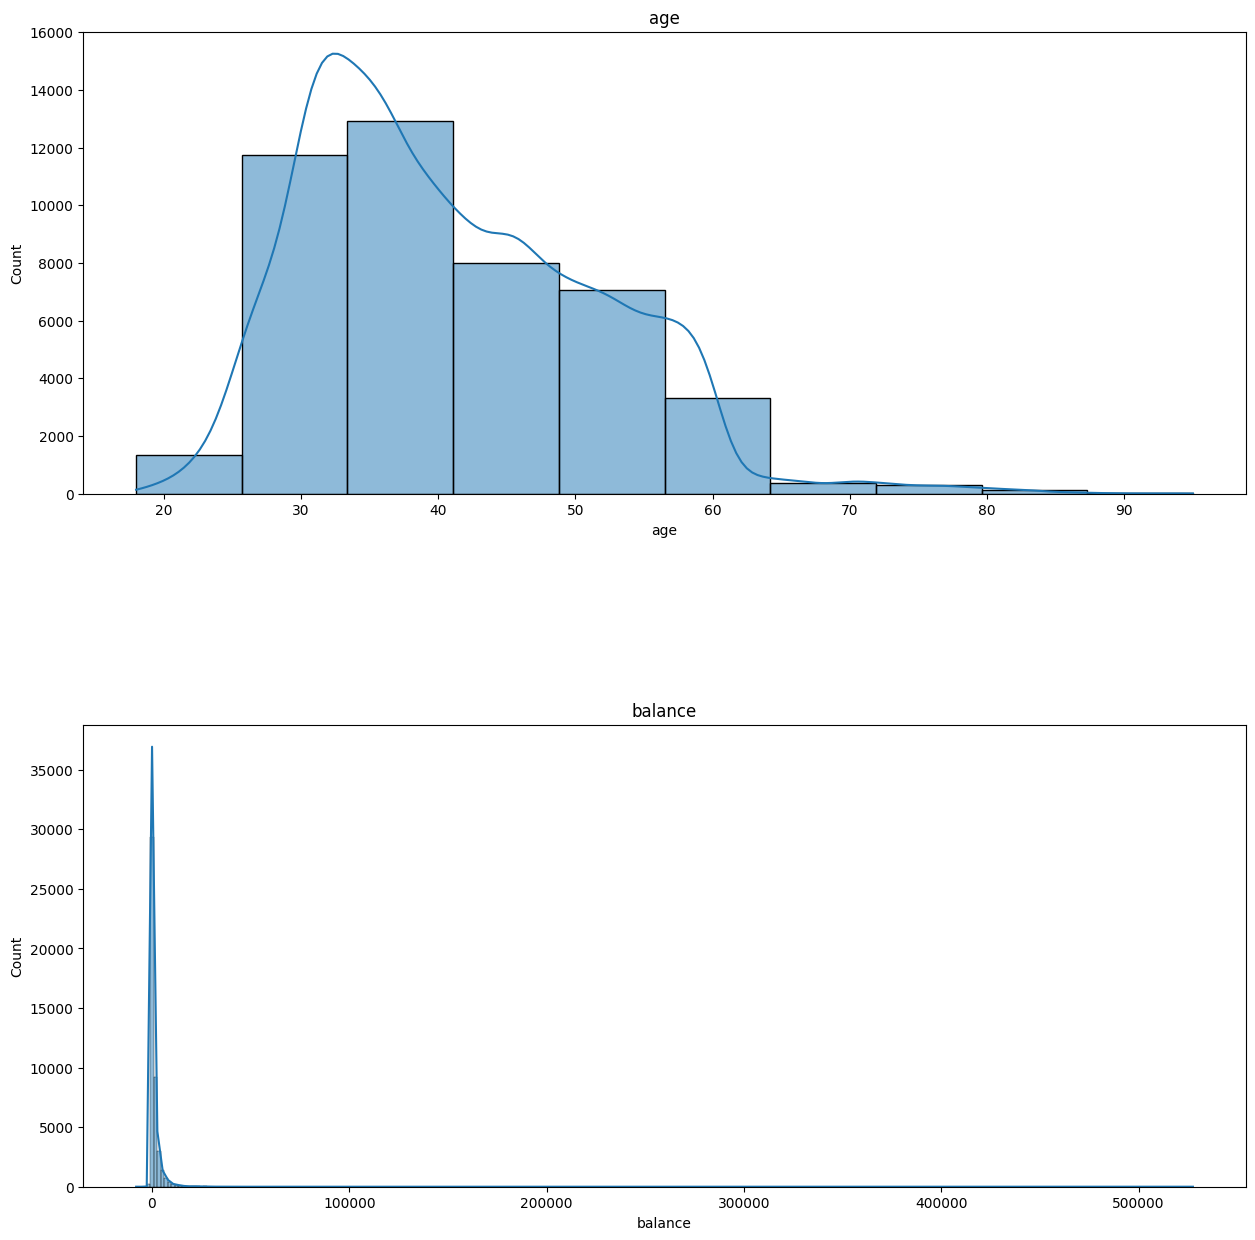

In [11]:
#Columnas numéricas
cols_num=["age","balance"]

#Graficar 
fig, ax = plt.subplots (nrows=len(cols_num), ncols=1, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate (cols_num):
  if col == "age":
    nbins = 10
  else:
    nbins = 300
  sns.histplot (data=df, x=col, ax=ax[i], bins=nbins, kde=True)
  ax[i].set_title(col)

  

Observaciones: Se necesita detallar más balance

In [12]:
#detallar balance
df["balance"].describe()

count     45189.000000
mean       1374.012149
std        3924.370039
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      527532.000000
Name: balance, dtype: float64

Observaciones: 
*La mayor cantidad de personas tienen entre 30 y 40 años. Los datos se concentran de los 25 a los 65 años.
*Menos del 75% de datos tiene menos de 1428 Euros en su cuenta de saldo.

#Análisis Univariado

Analizar si existe alguna relación entre las posibles variables predictoras y la variable a predecir "y".

##Tasa de conversión

Analizar el porcentaje que adquirio el producto.

In [13]:
#Representar "y", variable a predecir, en forma binaria para poder calcular la tasa de conversión, el promedio
#crear un diccionario.
diccionario={"yes":1, "no":0}
#crear variable binaria la cual mapea(cambia) el yes y no
binario=df["y"].map(diccionario)
#crear una columna para esos datos binarios.
df["y_binario"]= binario
#ver columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   poutcome   45189 non-null  object 
 9   y          45189 non-null  object 
 10  y_binario  45189 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 3.8+ MB


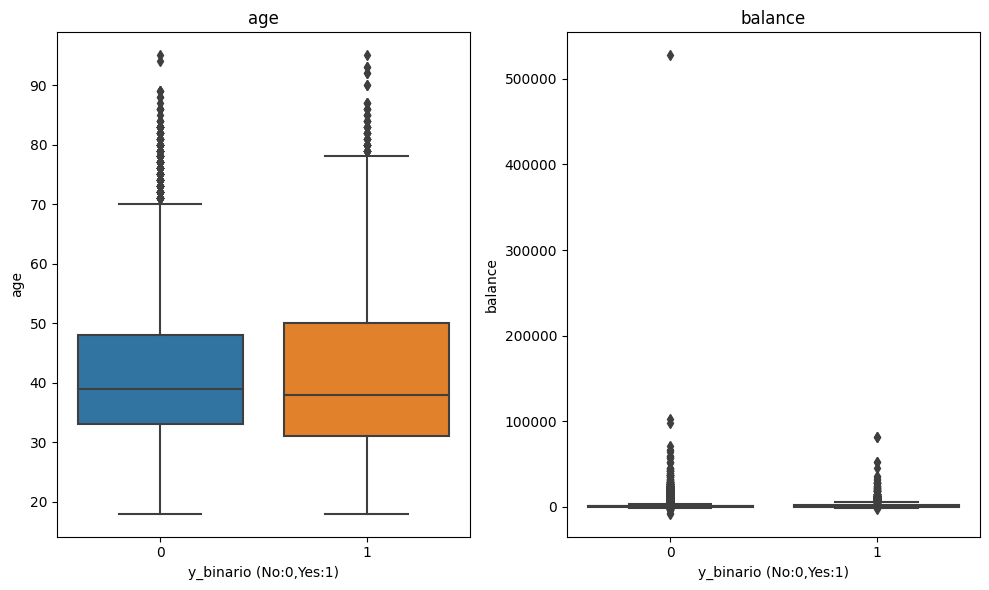

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas
cols_num = ["age", "balance"]

# Variable predictoria
y_binario = "y_binario"

# Mapeo de etiquetas para el eje x
x_labels = {0: "No:0", 1: "Yes:1"}

# Crear figura y ejes
fig, axes = plt.subplots(nrows=1, ncols=len(cols_num), figsize=(10, 6))

# Generar boxplot para cada variable numérica
for i, col in enumerate(cols_num):
    sns.boxplot(data=df, x=y_binario, y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(y_binario + " (" + x_labels[0] + "," + x_labels[1] + ")")
    axes[i].set_ylabel(col)

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   poutcome   45189 non-null  object 
 9   y          45189 non-null  object 
 10  y_binario  45189 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 3.8+ MB


Observaciones: Ni age ni balance muestran diferencias para adquirir el producto. La media en age es la misma al igual que en balance. 

Crear la tasa de conversión

In [16]:
#Función para crear la tasa de conversión, promedio . 100
def graficar_tasa_conversion (var_predictora, var_predecir, type="line", order=None):
  x,y= var_predictora , var_predecir
  #generar agrupaciones en el eje x y en el eje y el % de la media
  grupo = df.groupby(x)[y].mean().mul(100).rename("tasa_conversion").reset_index()
  #generar gráfico
  if type == "line": #para variables continuas
    plt.figure (figsize=(10,6))
    sns.lineplot (x=var_predictora, y="tasa_conversion" , data=grupo)
    plt.grid ()
  elif type == "bar": #para variables categóricas
    plt.figure (figsize= (14,6))
    sns.barplot (x=var_predictora, y="tasa_conversion", data=grupo, order=order)
    plt.grid ()
  elif type == "scatter": # dispersión para variables en rangos o categóricas
    plt.figure (figsize=(10,6))
    sns.scatterplot (x=var_predictora, y="tasa_conversion", data=grupo)
    plt.grid()




In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   poutcome   45189 non-null  object 
 9   y          45189 non-null  object 
 10  y_binario  45189 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 3.8+ MB


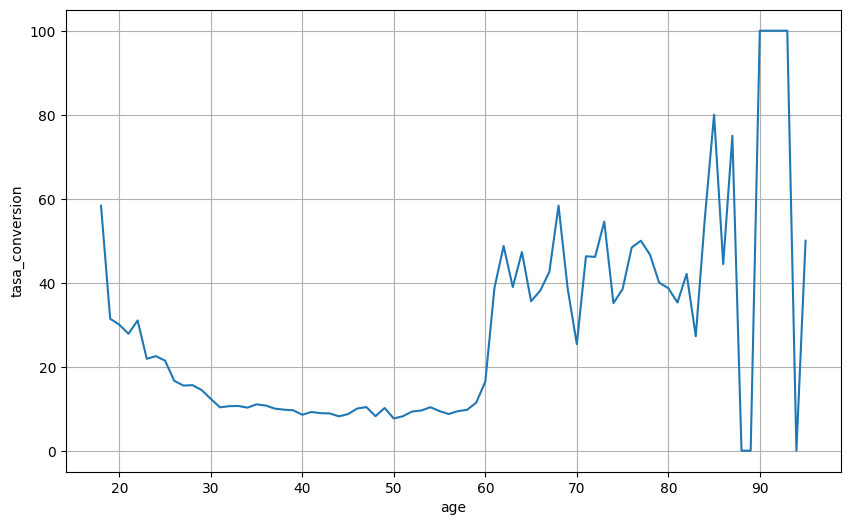

In [18]:
#graficar variables age 
graficar_tasa_conversion ("age", "y_binario")

Observaciones: Tres rangos de edad. Entre 18 y 25 años. Entre 60 y 85. Picos entre 85 y 87, luego picos de 90 a 95. Una meseta de ventas entre 25 y 60 años.



Por lo tanto vamos a crear subgrupos de edades para realizar el análisis.
*18-25
*25-60
*60-85
*85 a más

In [19]:
# Definir los límites de los rangos de edad
edades = [18, 25, 60, 85, df["age"].max()]

# Definir las etiquetas de los subgrupos
etiquetas = ["18-25", "25-60", "60-85", ">85"]

# Crear la columna "grupos_edad" utilizando pd.cut()
df["grupos_edad"] = pd.cut(df["age"], bins=edades, labels=etiquetas, right=False)

#definir variable grupos_edad como int
#df["grupos_edad"]=df["grupos_edad"].astype(int)

# Mostrar el DataFrame resultante
df.info()
df.shape
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          45189 non-null  int64   
 1   job          45189 non-null  object  
 2   marital      45189 non-null  object  
 3   education    45189 non-null  object  
 4   default      45189 non-null  object  
 5   balance      45189 non-null  float64 
 6   housing      45189 non-null  object  
 7   loan         45189 non-null  object  
 8   poutcome     45189 non-null  object  
 9   y            45189 non-null  object  
 10  y_binario    45189 non-null  int64   
 11  grupos_edad  45187 non-null  category
dtypes: category(1), float64(1), int64(2), object(8)
memory usage: 3.8+ MB


,age,job,marital,education,default,balance,housing,loan,poutcome,y,y_binario,grupos_edad
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,no,0,25-60
1,44,technician,single,secondary,no,29.0,yes,no,unknown,no,0,25-60
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,no,0,25-60
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,no,0,25-60
4,33,unknown,single,unknown,no,1.0,no,no,unknown,no,0,25-60


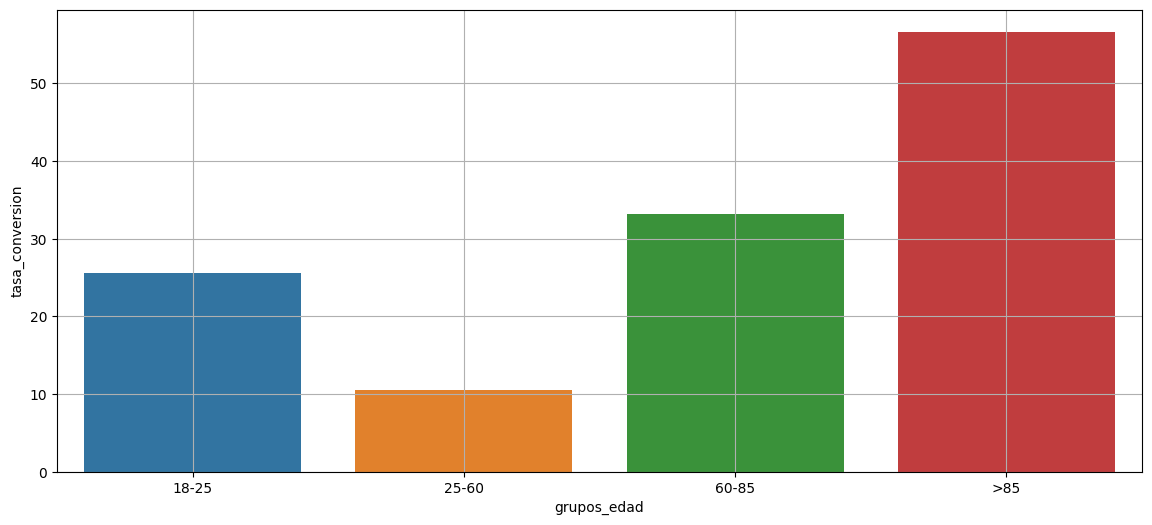

In [20]:
#Graficar tasa de conversión para la nueva columna de grupos de edad.
graficar_tasa_conversion ("grupos_edad", "y_binario", type="bar")

Observaciones: 
* 18-25 tasa 24%
* 25-60 tasa 11%
* 60-85 tasa 32%
* +85 tasa 55%

Analizamos la variable balance

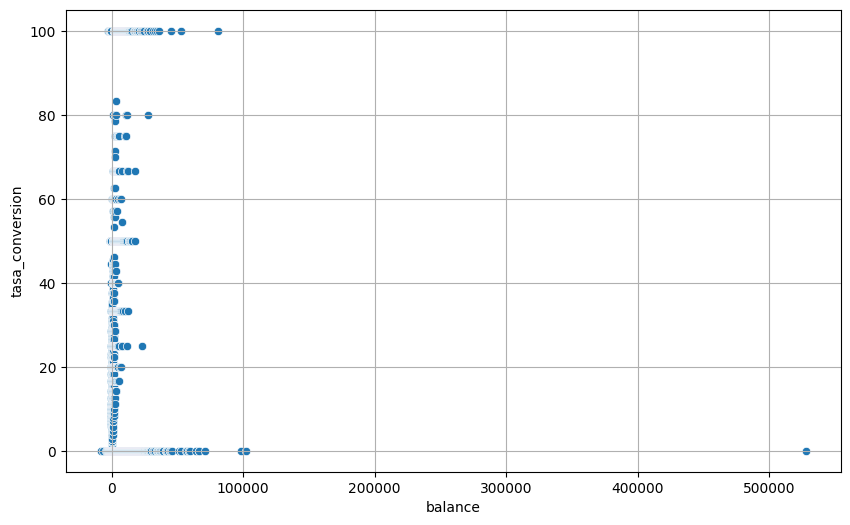

In [21]:
#Graficamos balance en un grafico de disperción
graficar_tasa_conversion ("balance", "y_binario", type="scatter")

Observaciones: Se necesita ver más en detalle cerca de cero. 
Generar diferentes rangos llamados grupos_balance.
* menor 0
* 0-4000
* 4000-8000
* 8000-12000
* 12000-16000
* 16000-20000
* 20000-24000
* 24000-28000
* 28000-32000
* 32000-36000
* 36000-40000
* mayor 40000

In [22]:
# Definir los límites de los rangos de edad
rangos = [-float("inf"),0, 4000, 8000, 12000, 16000, 20000, 24000, 28000, 32000, 36000, 40000, float("inf")]

# Definir las etiquetas de los subgrupos
etiquetas = ["<0", "0-4000", "4000-8000", "8000-12000", "12000-16000", "16000-20000", "20000-24000", "24000-28000", "28000-32000", "32000-36000", "36000-40000", ">40000"]

# Crear la columna "grupos_edad" utilizando pd.cut()
df["grupos_balance"] = pd.cut(df["balance"], bins=rangos, labels=etiquetas, right=False)

#definir variable grupos_edad como int
#df["grupos_edad"]=df["grupos_edad"].astype(int)

# Mostrar el DataFrame resultante
df.info()
df.shape
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45189 non-null  int64   
 1   job             45189 non-null  object  
 2   marital         45189 non-null  object  
 3   education       45189 non-null  object  
 4   default         45189 non-null  object  
 5   balance         45189 non-null  float64 
 6   housing         45189 non-null  object  
 7   loan            45189 non-null  object  
 8   poutcome        45189 non-null  object  
 9   y               45189 non-null  object  
 10  y_binario       45189 non-null  int64   
 11  grupos_edad     45187 non-null  category
 12  grupos_balance  45189 non-null  category
dtypes: category(2), float64(1), int64(2), object(8)
memory usage: 3.9+ MB


,age,job,marital,education,default,balance,housing,loan,poutcome,y,y_binario,grupos_edad,grupos_balance
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,no,0,25-60,0-4000
1,44,technician,single,secondary,no,29.0,yes,no,unknown,no,0,25-60,0-4000
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,no,0,25-60,0-4000
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,no,0,25-60,0-4000
4,33,unknown,single,unknown,no,1.0,no,no,unknown,no,0,25-60,0-4000


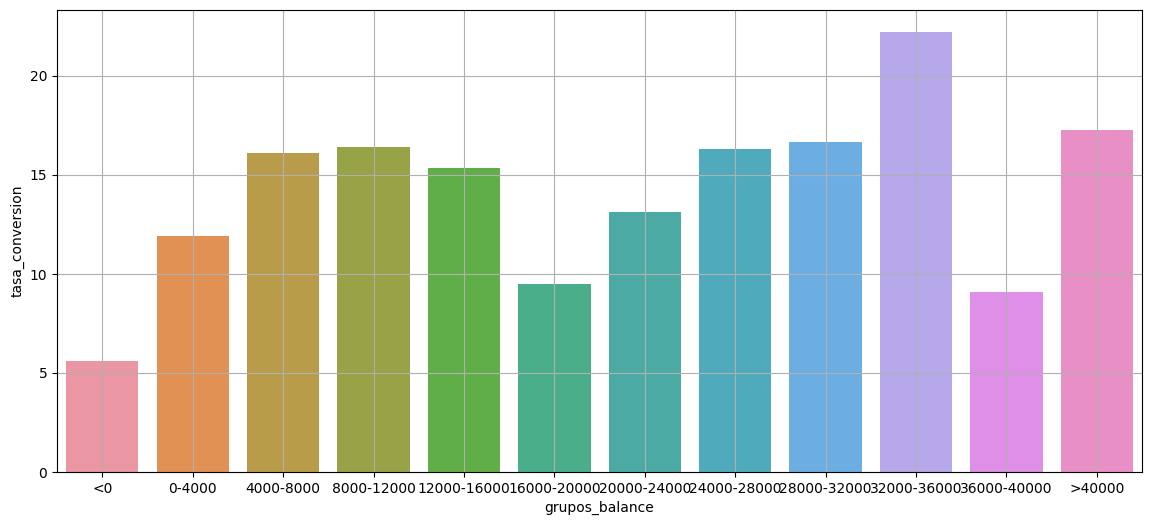

In [23]:
#Graficar en barras grupos_balance
graficar_tasa_conversion ("grupos_balance", "y_binario", type="bar" )

Observaciones: Se pueden volver a agrupar los valores.
* menor 0
* 0-4000
* 4000-16000
* 16000-20000
* 20000-32000
* 32-36k
* 36-40k
* mas 40k

In [24]:
# Definir los límites de los rangos de edad
rangos = [-float("inf"),0, 4000, 16000, 20000, 32000, 36000, 40000, float("inf")]

# Definir las etiquetas de los subgrupos
etiquetas = ["<0", "0-4k", "4-16k", "16-20k", "20-32k", "32-36k", "36-40k", ">40k"]

# Crear la columna "grupos_edad" utilizando pd.cut()
df["grupos_balance"] = pd.cut(df["balance"], bins=rangos, labels=etiquetas, right=False)

#definir variable grupos_edad como int
#df["grupos_edad"]=df["grupos_edad"].astype(int)

# Mostrar el DataFrame resultante
df.info()
df.shape
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45189 non-null  int64   
 1   job             45189 non-null  object  
 2   marital         45189 non-null  object  
 3   education       45189 non-null  object  
 4   default         45189 non-null  object  
 5   balance         45189 non-null  float64 
 6   housing         45189 non-null  object  
 7   loan            45189 non-null  object  
 8   poutcome        45189 non-null  object  
 9   y               45189 non-null  object  
 10  y_binario       45189 non-null  int64   
 11  grupos_edad     45187 non-null  category
 12  grupos_balance  45189 non-null  category
dtypes: category(2), float64(1), int64(2), object(8)
memory usage: 3.9+ MB


,age,job,marital,education,default,balance,housing,loan,poutcome,y,y_binario,grupos_edad,grupos_balance
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,no,0,25-60,0-4k
1,44,technician,single,secondary,no,29.0,yes,no,unknown,no,0,25-60,0-4k
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,no,0,25-60,0-4k
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,no,0,25-60,0-4k
4,33,unknown,single,unknown,no,1.0,no,no,unknown,no,0,25-60,0-4k


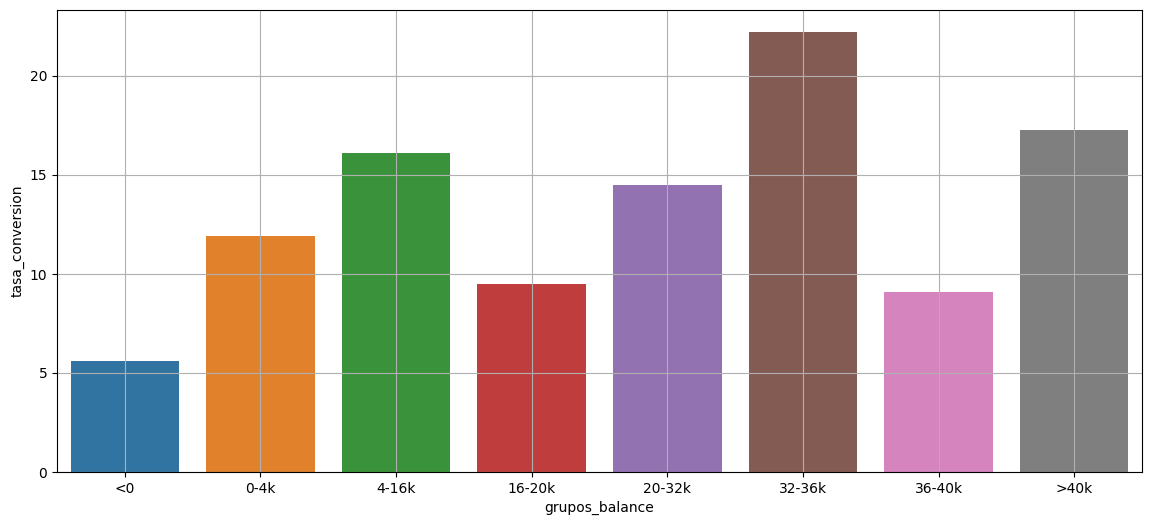

In [25]:
#Graficar en barras grupos_balance
graficar_tasa_conversion ("grupos_balance", "y_binario", type="bar" )

Observaciones: Tiene mayor tasa:
1. 36-40k casi 30%
2. mayor 40k casi 17%
3. 20-32k 14%
4. 0-4k 13%
5. 16-20k 36-40k casi ambos 9%
6. menos 0 casi 6%





##Análisis variables categóricas

Variable Job

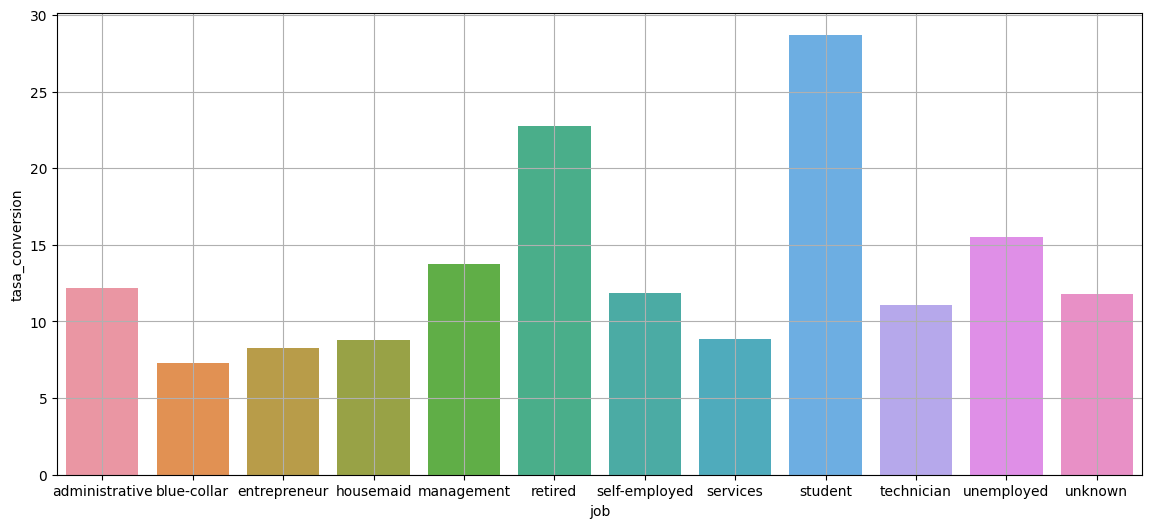

In [26]:
graficar_tasa_conversion("job","y_binario",type="bar")

Observaciones: Las personas con mayor tasa son estudiantes con casi 30% y retirados con casi 27%.

Variable Marital

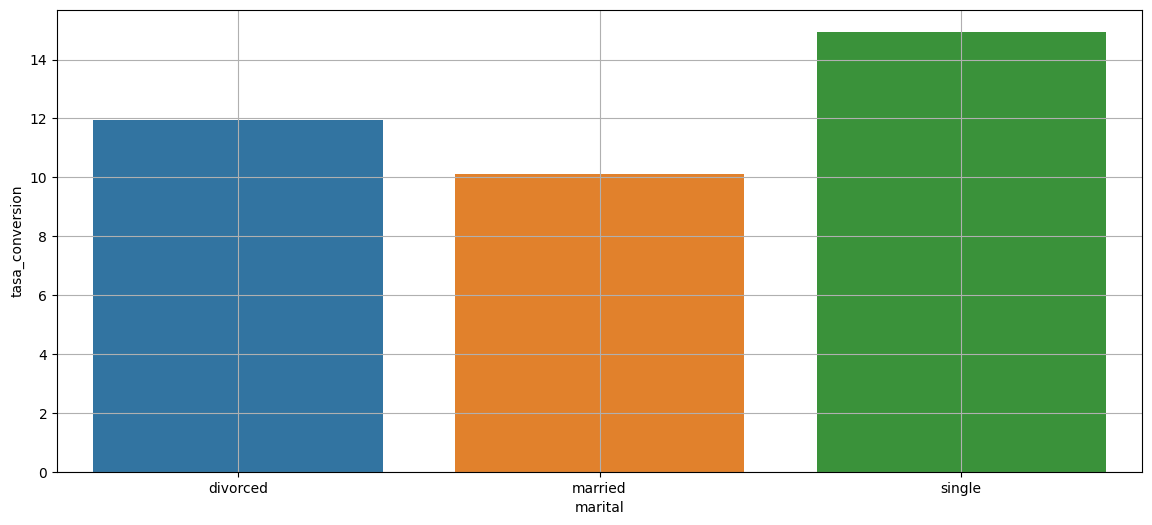

In [27]:
#Grafico de barras de variable marital
graficar_tasa_conversion ("marital", "y_binario", type="bar")

Observaciones: puede llegar a no ser una variable predictora, pero, las personas solteras tienen más tasa, luego le siguen las divorsiadas y por último las casadas.

Variable Education

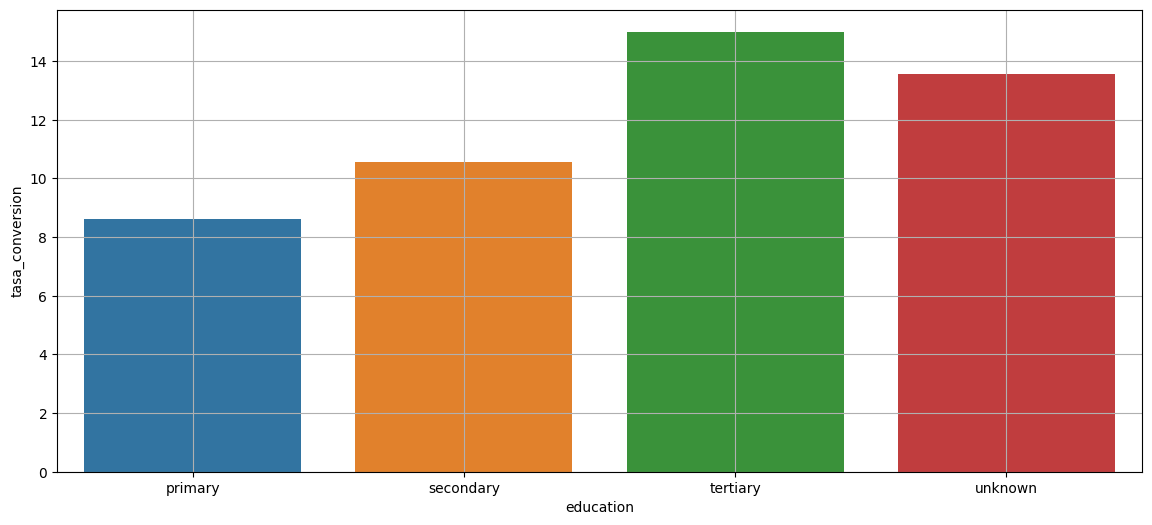

In [28]:
#Graficar variable education
graficar_tasa_conversion ("education", "y_binario", type="bar")

Observaciones: A medida que aumenta el nivel educativo aumenta la tasa de conversión, puede estar asociado más bien a los ingresos.

Variable default (si pagan o no) yes:no paga a tiempo. no: paga a tiempo.

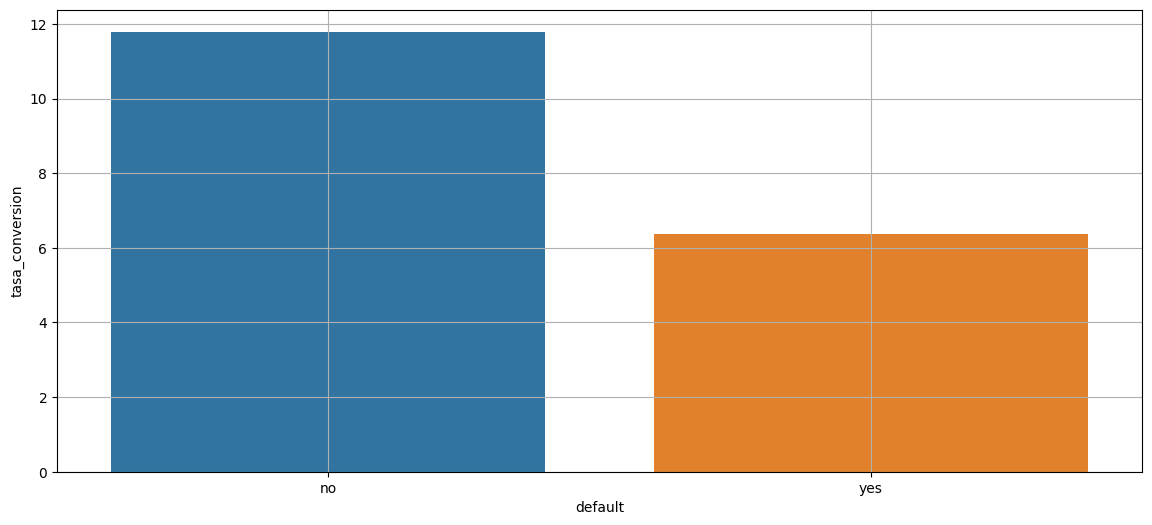

In [29]:
#Graficar variable default
graficar_tasa_conversion ("default", "y_binario", type="bar")

Observaciones: Las personas que pagan sus deudas a tiempo tienen el doble de tasa de conversión en comparación con las que no.

Variable housing (quienes tienen crédito hipotecario)

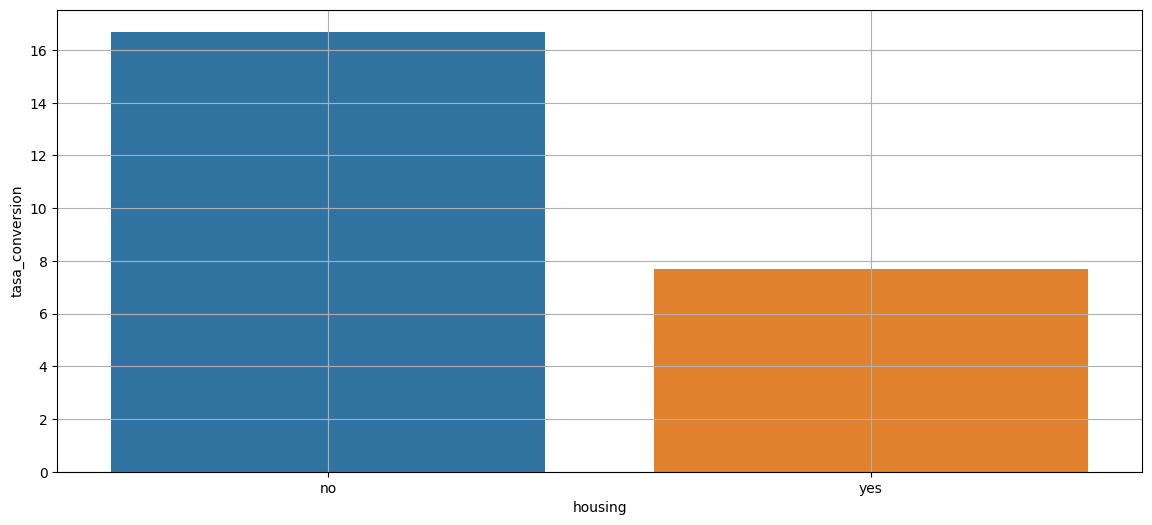

In [30]:
#Graficar variable housing
graficar_tasa_conversion ("housing", "y_binario", type="bar")

Observaciones: La tasa de conversión de los que no tienen crédito hipotecario es casi el doble de las que tienen crédito hipotecario. 

Variable loan (gastos a pagar)

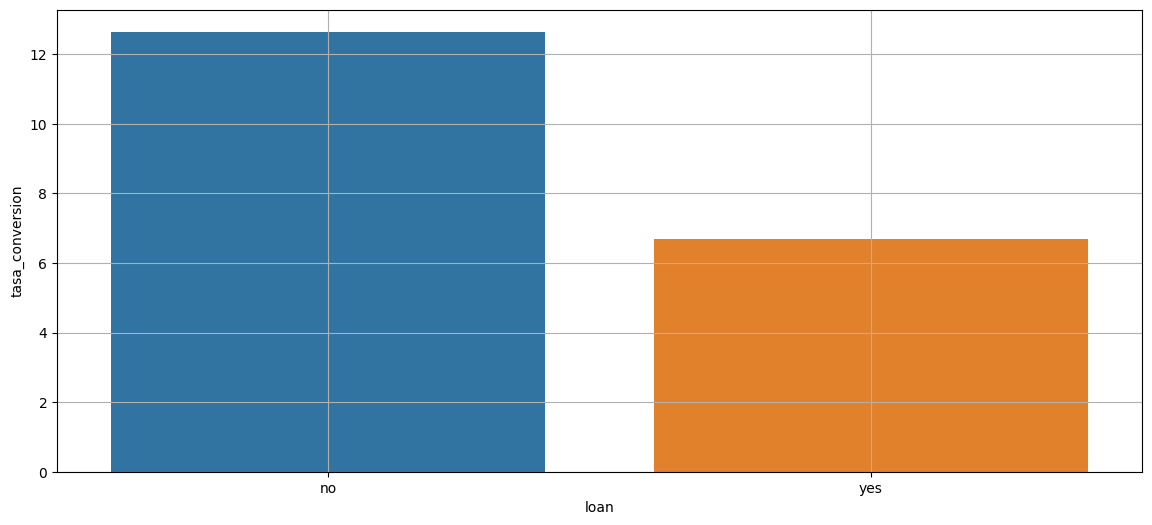

In [31]:
#Graficar variable loan
graficar_tasa_conversion ("loan", "y_binario", type="bar")

Observaciones: Igual que la variable housing, las personas que no tienen deudas de otros creditos a pagar tienen el doble de tasa de conversion que las que tienen deudas.

Variable poutcome (si la persona adquirio un producto en campañas anteriores)

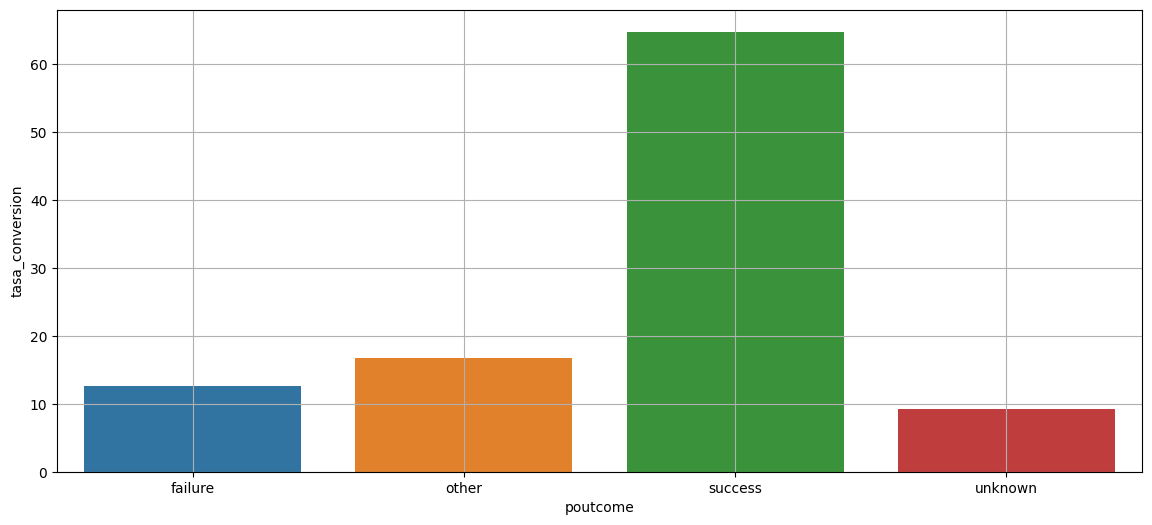

In [32]:
#Graficar variable poutcome
graficar_tasa_conversion ("poutcome", "y_binario", type= "bar")

Observaciones: adquirieron producto anterior casi 65%
Variable predictoria.

##Resumen análisis univariado

Las variables predictoras en orden de importancia pueden ser:
1. poutcome: adquirieron el producto anterior casi 65%.
2. job: student 30% y retired casi 27%.
3. grupo_balance: variables de 16% y de 20%.
4. grupo_edad: mas de 60años 24% y menores de 24años 16%.
5. loan y housing: con credito hipotecario y otros, ambas casi 16%
marital y education: muy poca diferencia entre variables, (single y tertiary casi 16%).
6. default: personas que pagan sus deudas a tiempor casi 12%.

#Análisis Bivariado

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45189 non-null  int64   
 1   job             45189 non-null  object  
 2   marital         45189 non-null  object  
 3   education       45189 non-null  object  
 4   default         45189 non-null  object  
 5   balance         45189 non-null  float64 
 6   housing         45189 non-null  object  
 7   loan            45189 non-null  object  
 8   poutcome        45189 non-null  object  
 9   y               45189 non-null  object  
 10  y_binario       45189 non-null  int64   
 11  grupos_edad     45187 non-null  category
 12  grupos_balance  45189 non-null  category
dtypes: category(2), float64(1), int64(2), object(8)
memory usage: 3.9+ MB


##Función tasa de tasa de conversión de dos columnas

In [48]:
#Graficar tasa de conversión para dos columnas, bivariada
def graficar_tc_bivariada (col_list, orden=None): #col_list (dos variables)
  #generar agrupaciones en col_list y en el % de la media
  tc = df.groupby(col_list)["y_binario"].mean().mul(100).to_frame().reset_index()
  #generar gráfico
  #Tamaño de la figura
  plt.figure (figsize= (15,5))
  #Definir variables del grafico de puntos
  ax = sns.pointplot(x=tc["y_binario"], y=tc[col_list[0]], hue=tc[col_list[1]], order=orden, join=False)
  #que tenga lineas
  ax.yaxis.grid(True)
  ax.xaxis.grid(True)
  #Titulos
  plt.title(f'Tasa de conversión para {col_list[0]} y {col_list[1]}')
  plt.xlabel('Tasa de conversión (%)')
  #Tamaño del eje x
  plt.xlim((0,120));


###Graficar para job y pountcome

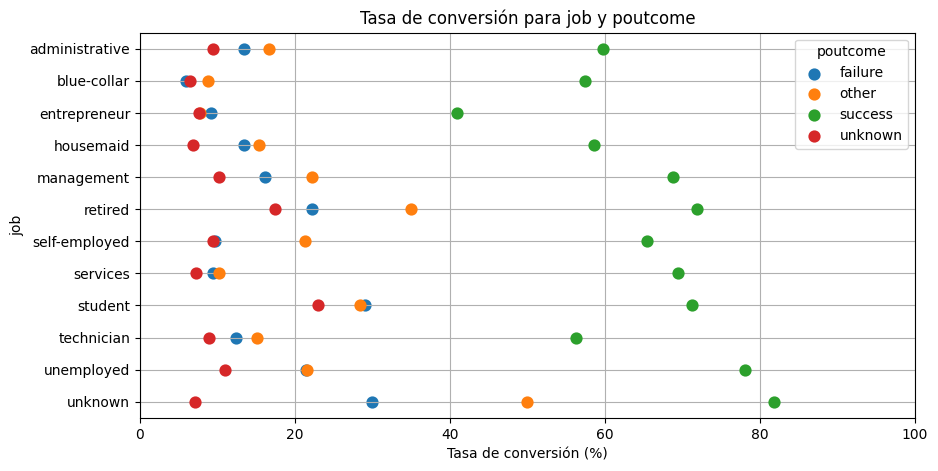

In [43]:
graficar_tc_bivariada(['job','poutcome'])

Observaciones: Personas que adquirieron el producto anteriormente tiene una tasa de conversión de casi el 80%. Continuan los retirados y estudiantes con casi el 70%. Services y management casi 68%. self-employed casi 65%.

###Graficar poutcome y grupos_balance

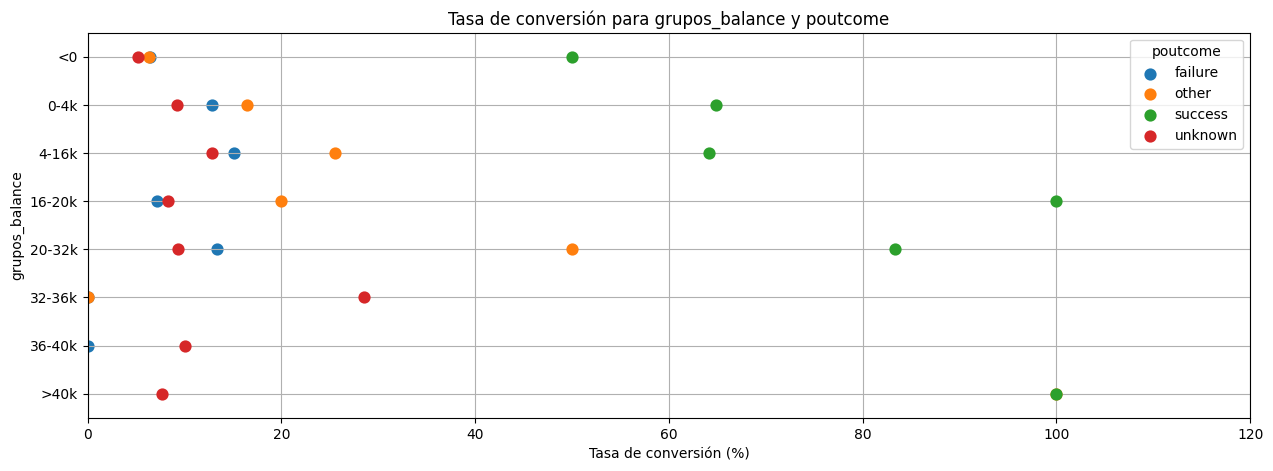

In [49]:
graficar_tc_bivariada (["grupos_balance", "poutcome"])

Observaciones: Personas con exito en la campaña anterior: Tasa de conversión del 100% personas con saldo en cuenta de más de 40k y de 16-20k. Tasa de conversión del 82% personas con saldo en cuenta entre 20-32k. Tasa del 63% de 0-16k.

###Graficar para grupos_edad y poutcome


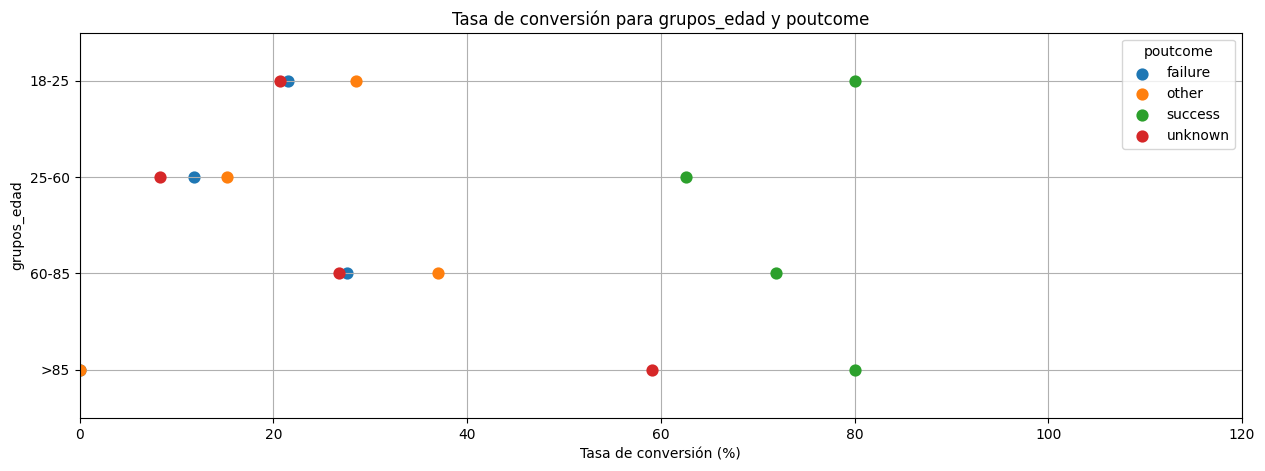

In [50]:
graficar_tc_bivariada (["grupos_edad", "poutcome"])

Observaciones:
Personas con exito en campaña anterior.
Tasa de conversión del 80% más de 85 años y 18-25 años.
Tasa de casi 72% de 60-85 años.
Tasa de casi 62% de 25-60 años.

###Graficar poutcome y default/ housing/ loan.

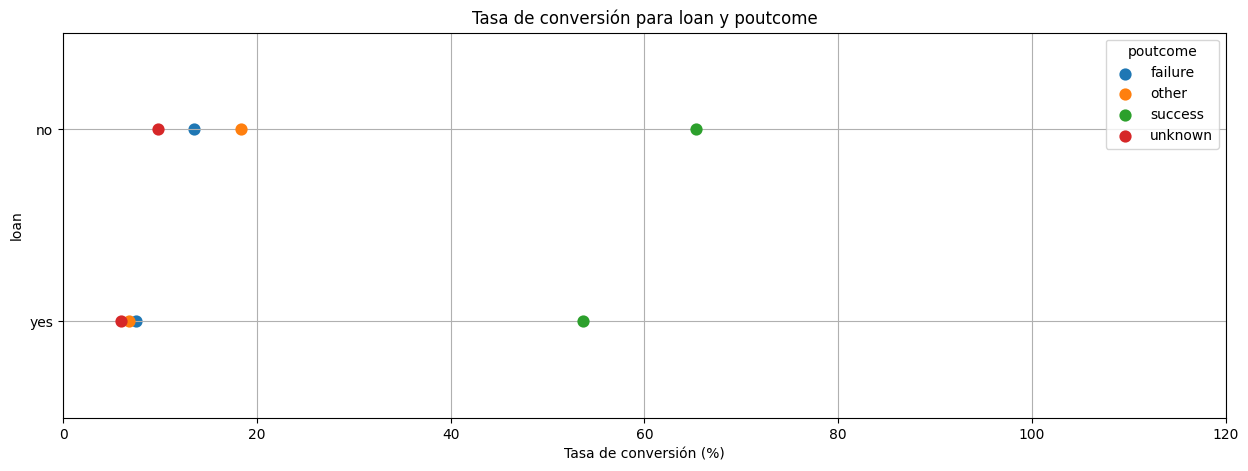

In [53]:
#graficar_tc_bivariada (["default", "poutcome"])
#graficar_tc_bivariada (["housing", "poutcome"])
graficar_tc_bivariada (["loan", "poutcome"])

Observaciones:
Personas con exito en campaña anterior:
%62, que pagan sus deudas a tiempo
%70, no tienen credito hipotecario.
%63, no tienen otros créditos
Pero casi el 50% tiene creditos hipotecarios y otros. 



###Graficar marital y education (variables no tenían gran impacto)

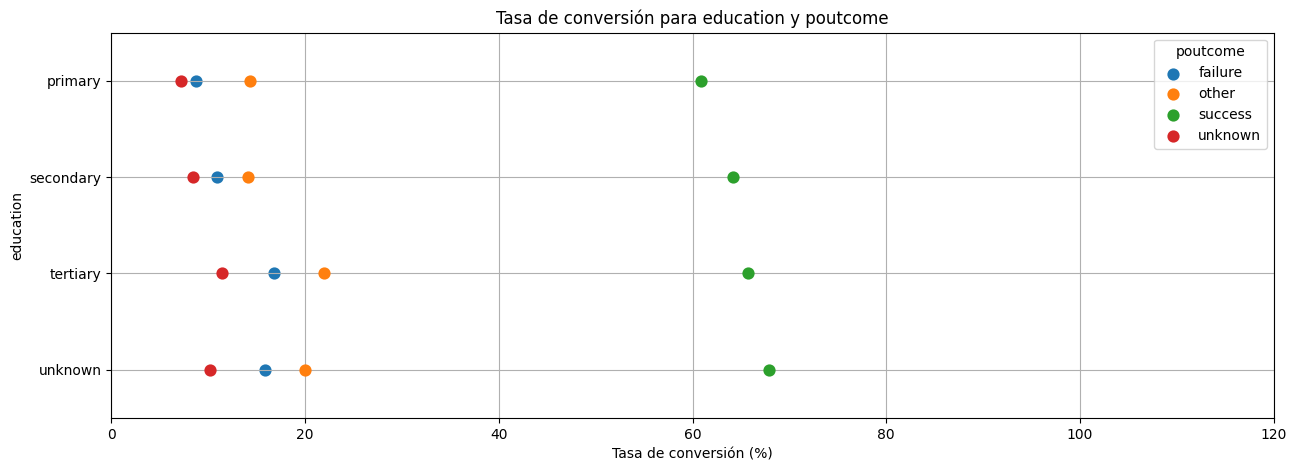

In [55]:
#graficar_tc_bivariada (["marital", "poutcome"])
graficar_tc_bivariada (["education", "poutcome"])

Observaciones: ambas siguen siendo irrelevantes ya que todas tienen casi la misma tasa de conversión.

#Conclusiones:



La variable "poutcome" seguida de "job", "grupo_edad" y "grupo_balance" son las más relevantes para la tasa de converión. 

Con este análisis, el cliente ideal tendría el siguiente perfil:
* Haber sido contactado previamente por el banco, y haber adquirido el producto de la campaña. "poutcome"==success
* La persona este desempleada, retirada o sea estudiante con más de 85 años o entre 18 y 25 años.
* Saldo en la cuenta mayor a EUR 40000 o entre EUR 16000 y 20000. (Preferiblemente)
* Que no posean credito hipotecario o de consumo o que no tengan defoult (y posean creditos).

El siguiente paso sería usar un modelo de Marching Learning que permita visualizar comportamientos o patrones que no resultaron con este análisis exploratorio